# Forest Cover Type Prediction
Use cartographic variables to classify forest categories

## Testing Others Algorithms

#### Problem
The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

    1 - Spruce/Fir
    2 - Lodgepole Pine
    3 - Ponderosa Pine
    4 - Cottonwood/Willow
    5 - Aspen
    6 - Douglas-fir
    7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

#### Evaluation Metric
Multi-class classification accuracy

## Imports

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib as m
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# make pandas show all columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Formating the plots
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline

plt.style.use('fivethirtyeight')
m.rcParams['axes.labelsize'] = 14
m.rcParams['xtick.labelsize'] = 12
m.rcParams['ytick.labelsize'] = 12
m.rcParams['figure.figsize'] = (15, 5)
m.rcParams['font.size'] = 12
m.rcParams['legend.fontsize'] = 'large'
m.rcParams['figure.titlesize'] = 'medium'
m.rcParams['text.color'] = 'k'
sns.set(rc={'figure.figsize':(15,5)})

In [2]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Forest Cover Type Prediction -- Jessica Cabral" --iversions
%watermark -n -t -z

pandas     1.1.0
seaborn    0.10.1
numpy      1.19.1
matplotlib 3.2.2
Forest Cover Type Prediction -- Jessica Cabral
Sat Aug 22 2020 13:55:52 Hora oficial do Brasil


In [3]:
np.random.seed(42)
random.seed(42)
random_seed = 42

## Import Data

In [4]:
train = pd.read_csv('../../data/train.csv')
test = pd.read_csv('../../data/test.csv')
sample_submission = pd.read_csv('../../data/sampleSubmission.csv')

print('Train: {}'.format(train.shape))
print('test: {}'.format(test.shape))
print('sample_submission: {}'.format(sample_submission.shape))

Train: (15120, 56)
test: (565892, 55)
sample_submission: (565892, 2)


In [5]:
display(train.head(), test.head())

train.shape, test.shape

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,5


,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,15121,2680,354,14,0,0,2684,196,214,156,6645,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,15122,2683,0,13,0,0,2654,201,216,152,6675,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,15123,2713,16,15,0,0,2980,206,208,137,6344,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,15124,2709,24,17,0,0,2950,208,201,125,6374,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,15125,2706,29,19,0,0,2920,210,195,115,6404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


((15120, 56), (565892, 55))

## Pre-Processing

In [6]:
# remove de ID column

train = train.drop(columns=['Id'], axis=1)
test = test.drop(columns=['Id'], axis=1)

train.shape, test.shape

((15120, 55), (565892, 54))

## Feature Engineering

For this baseline model I am not going to do any pre-processing or FE

## Save Model Results

In [7]:
# Create a dataframe to store the model results to compare later

def save_results(algorithm, acc_train, acc_test, sc, model_results):
    result = [
    algorithm,
    acc_train, 
    acc_test,
    sc.mean(),
    sc.std() * 2
    ]
        
    aux_df = (pd.DataFrame(result).T).rename(columns = {0:'algorithm' , 
                                                        1: 'accuracy_train', 
                                                        2: 'accuracy_test',
                                                        3: 'cross_val_score_mean', 
                                                        4:'cross_val_score_std'})
    model_results = model_results.append(aux_df, ignore_index=True)
    display(model_results)
    return model_results


model_results = pd.DataFrame(columns=['algorithm', 
                                      'accuracy_train',
                                      'accuracy_test',
                                      'cross_val_score_mean',
                                      'cross_val_score_std'])
model_results.head()

,algorithm,accuracy_train,accuracy_test,cross_val_score_mean,cross_val_score_std


## Confusion Matrix

In [8]:
def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)


## Modeling

In [9]:
X = train[train.columns[:-1]]
y = train['Cover_Type']

display(X.head(), y.head())

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,Soil_Type2,Soil_Type3,Soil_Type4,Soil_Type5,Soil_Type6,Soil_Type7,Soil_Type8,Soil_Type9,Soil_Type10,Soil_Type11,Soil_Type12,Soil_Type13,Soil_Type14,Soil_Type15,Soil_Type16,Soil_Type17,Soil_Type18,Soil_Type19,Soil_Type20,Soil_Type21,Soil_Type22,Soil_Type23,Soil_Type24,Soil_Type25,Soil_Type26,Soil_Type27,Soil_Type28,Soil_Type29,Soil_Type30,Soil_Type31,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40
0,2596,51,3,258,0,510,221,232,148,6279,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,2590,56,2,212,-6,390,220,235,151,6225,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2804,139,9,268,65,3180,234,238,135,6121,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2785,155,18,242,118,3090,238,238,122,6211,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,2595,45,2,153,-1,391,220,234,150,6172,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


0    5
1    5
2    2
3    2
4    5
Name: Cover_Type, dtype: int64

In [10]:
# train and test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=random_seed)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10130, 54), (4990, 54), (10130,), (4990,))

#### DecisionTreeClassifier

In [11]:
# Modeling

# Create the model on train dataset
clf_decision_tree = DecisionTreeClassifier(random_state=random_seed)
clf_decision_tree.fit(X_train, y_train)

# Calculate the accuracy

# accuracy in train
y_train_pred  = clf_decision_tree.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred , normalize=True)*100
print('Accuracy in train data: {:0.2f}%'.format(acc_train))

# accuracy in test
y_test_pred  = clf_decision_tree.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred , normalize=True)*100
print('Accuracy in test data: {:0.2f}%'.format(acc_test))

# Classification Report
print('\nClassification Report in test dataset')
print(classification_report(y_test, y_test_pred))

Accuracy in train data: 100.00%
Accuracy in test data: 77.90%

Classification Report in test dataset
              precision    recall  f1-score   support

           1       0.64      0.67      0.65       679
           2       0.63      0.58      0.60       722
           3       0.74      0.73      0.73       704
           4       0.93      0.94      0.93       739
           5       0.84      0.86      0.85       721
           6       0.76      0.76      0.76       722
           7       0.91      0.91      0.91       703

    accuracy                           0.78      4990
   macro avg       0.78      0.78      0.78      4990
weighted avg       0.78      0.78      0.78      4990



In [12]:
sc_decision_tree = cross_val_score(clf_decision_tree, X, y, scoring='accuracy', cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (sc_decision_tree.mean(), sc_decision_tree.std() * 2))

Accuracy: 0.71 (+/- 0.08)


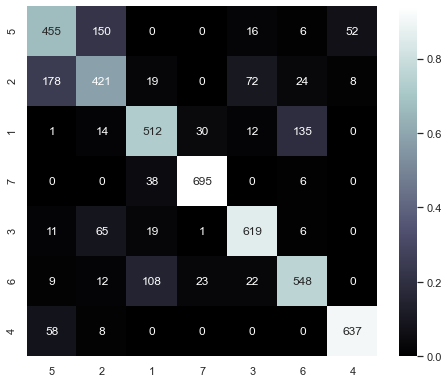

In [13]:
cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, train.Cover_Type.unique())

In [14]:
# save the results
model_results = save_results('DecisionTreeClassifier', acc_train, acc_test, sc_decision_tree, model_results)

,algorithm,accuracy_train,accuracy_test,cross_val_score_mean,cross_val_score_std
0,DecisionTreeClassifier,100,77.8958,0.709458,0.0843746


#### ExtraTreeClassifier

In [15]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier

clf_extra_tree = ExtraTreeClassifier(random_state=random_seed)
clf_extra_tree = BaggingClassifier(clf_extra_tree, random_state=random_seed).fit(X_train, y_train)

# Calculate the accuracy

# accuracy in train
y_train_pred  = clf_extra_tree.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred , normalize=True)*100
print('Accuracy in train data: {:0.2f}%'.format(acc_train))

# accuracy in test
y_test_pred  = clf_extra_tree.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred , normalize=True)*100
print('Accuracy in test data: {:0.2f}%'.format(acc_test))

# Classification Report
print('\nClassification Report in test dataset')
print(classification_report(y_test, y_test_pred))

Accuracy in train data: 99.38%
Accuracy in test data: 81.48%

Classification Report in test dataset
              precision    recall  f1-score   support

           1       0.69      0.73      0.71       679
           2       0.72      0.61      0.66       722
           3       0.75      0.76      0.76       704
           4       0.90      0.96      0.93       739
           5       0.87      0.91      0.89       721
           6       0.79      0.78      0.79       722
           7       0.94      0.95      0.95       703

    accuracy                           0.81      4990
   macro avg       0.81      0.81      0.81      4990
weighted avg       0.81      0.81      0.81      4990



In [16]:
sc_extra_tree = cross_val_score(clf_extra_tree, X, y, scoring='accuracy', cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (sc_extra_tree.mean(), sc_extra_tree.std() * 2))

Accuracy: 0.74 (+/- 0.09)


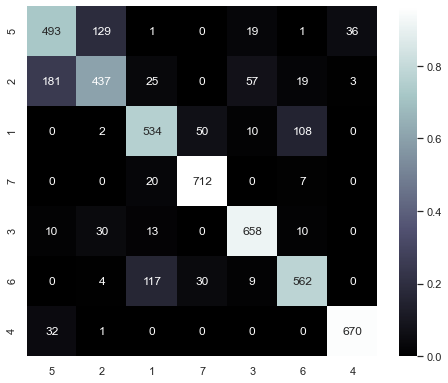

In [17]:
cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, train.Cover_Type.unique())

In [18]:
# save the results
model_results = save_results('ExtraTreeClassifier', acc_train, acc_test, sc_extra_tree, model_results)

,algorithm,accuracy_train,accuracy_test,cross_val_score_mean,cross_val_score_std
0,DecisionTreeClassifier,100,77.8958,0.709458,0.0843746
1,ExtraTreeClassifier,99.3781,81.483,0.742526,0.0941889


#### KNeighborsClassifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

clf_neigh = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

# Calculate the accuracy

# accuracy in train
y_train_pred  = clf_neigh.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred , normalize=True)*100
print('Accuracy in train data: {:0.2f}%'.format(acc_train))

# accuracy in test
y_test_pred  = clf_neigh.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred , normalize=True)*100
print('Accuracy in test data: {:0.2f}%'.format(acc_test))

# Classification Report
print('\nClassification Report in test dataset')
print(classification_report(y_test, y_test_pred))

Accuracy in train data: 90.74%
Accuracy in test data: 80.62%

Classification Report in test dataset
              precision    recall  f1-score   support

           1       0.69      0.63      0.66       679
           2       0.70      0.54      0.61       722
           3       0.80      0.74      0.77       704
           4       0.89      0.96      0.93       739
           5       0.81      0.96      0.88       721
           6       0.82      0.84      0.83       722
           7       0.89      0.96      0.92       703

    accuracy                           0.81      4990
   macro avg       0.80      0.80      0.80      4990
weighted avg       0.80      0.81      0.80      4990



In [20]:
sc_neigh = cross_val_score(clf_neigh, X, y, scoring='accuracy', cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (sc_neigh.mean(), sc_neigh.std() * 2))

Accuracy: 0.71 (+/- 0.11)


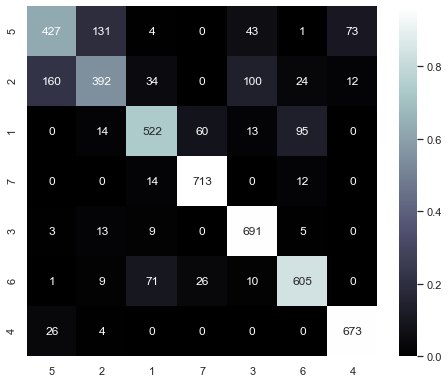

In [21]:
cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, train.Cover_Type.unique())

In [22]:
# save the results
model_results = save_results('KNeighborsClassifier', acc_train, acc_test, sc_neigh, model_results)

,algorithm,accuracy_train,accuracy_test,cross_val_score_mean,cross_val_score_std
0,DecisionTreeClassifier,100,77.8958,0.709458,0.0843746
1,ExtraTreeClassifier,99.3781,81.483,0.742526,0.0941889
2,KNeighborsClassifier,90.7404,80.6212,0.708466,0.107258


#### MLPClassifier

In [23]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(random_state=random_seed, max_iter=300).fit(X_train, y_train)

# Calculate the accuracy

# accuracy in train
y_train_pred  = clf_mlp.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred , normalize=True)*100
print('Accuracy in train data: {:0.2f}%'.format(acc_train))

# accuracy in test
y_test_pred  = clf_mlp.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred , normalize=True)*100
print('Accuracy in test data: {:0.2f}%'.format(acc_test))

# Classification Report
print('\nClassification Report in test dataset')
print(classification_report(y_test, y_test_pred))

Accuracy in train data: 68.00%
Accuracy in test data: 67.23%

Classification Report in test dataset
              precision    recall  f1-score   support

           1       0.63      0.49      0.55       679
           2       0.48      0.65      0.55       722
           3       0.65      0.44      0.53       704
           4       0.75      0.93      0.83       739
           5       0.80      0.62      0.70       721
           6       0.60      0.64      0.62       722
           7       0.84      0.92      0.88       703

    accuracy                           0.67      4990
   macro avg       0.68      0.67      0.67      4990
weighted avg       0.68      0.67      0.67      4990



In [24]:
sc_mlp = cross_val_score(clf_mlp, X, y, scoring='accuracy', cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (sc_mlp.mean(), sc_mlp.std() * 2))

Accuracy: 0.50 (+/- 0.16)


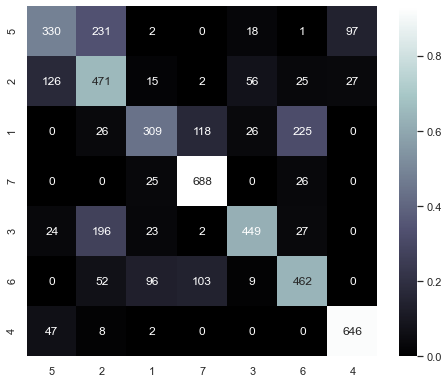

In [25]:
cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, train.Cover_Type.unique())

In [26]:
# save the results
model_results = save_results('MLPClassifier', acc_train, acc_test, sc_mlp, model_results)

,algorithm,accuracy_train,accuracy_test,cross_val_score_mean,cross_val_score_std
0,DecisionTreeClassifier,100,77.8958,0.709458,0.0843746
1,ExtraTreeClassifier,99.3781,81.483,0.742526,0.0941889
2,KNeighborsClassifier,90.7404,80.6212,0.708466,0.107258
3,MLPClassifier,67.9961,67.2345,0.503042,0.157859


#### RandomForestClassifier

In [27]:
from sklearn.ensemble import RandomForestClassifier

clf_random_forest = RandomForestClassifier(random_state=random_seed).fit(X_train, y_train)

# Calculate the accuracy

# accuracy in train
y_train_pred  = clf_random_forest.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred , normalize=True)*100
print('Accuracy in train data: {:0.2f}%'.format(acc_train))

# accuracy in test
y_test_pred  = clf_random_forest.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred , normalize=True)*100
print('Accuracy in test data: {:0.2f}%'.format(acc_test))

# Classification Report
print('\nClassification Report in test dataset')
print(classification_report(y_test, y_test_pred))

Accuracy in train data: 99.99%
Accuracy in test data: 85.51%

Classification Report in test dataset
              precision    recall  f1-score   support

           1       0.76      0.75      0.75       679
           2       0.78      0.67      0.72       722
           3       0.82      0.83      0.82       704
           4       0.92      0.98      0.95       739
           5       0.88      0.94      0.91       721
           6       0.86      0.85      0.86       722
           7       0.94      0.97      0.95       703

    accuracy                           0.86      4990
   macro avg       0.85      0.85      0.85      4990
weighted avg       0.85      0.86      0.85      4990



In [28]:
sc_random_forest = cross_val_score(clf_random_forest, X, y, scoring='accuracy', cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (sc_random_forest.mean(), sc_random_forest.std() * 2))

Accuracy: 0.78 (+/- 0.09)


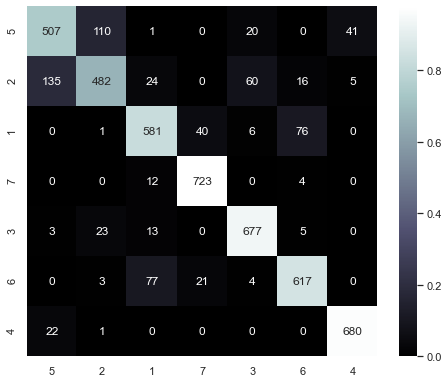

In [29]:
cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, train.Cover_Type.unique())

In [30]:
# save the results
model_results = save_results('RandomForestClassifier', acc_train, acc_test, sc_random_forest, model_results)

,algorithm,accuracy_train,accuracy_test,cross_val_score_mean,cross_val_score_std
0,DecisionTreeClassifier,100,77.8958,0.709458,0.0843746
1,ExtraTreeClassifier,99.3781,81.483,0.742526,0.0941889
2,KNeighborsClassifier,90.7404,80.6212,0.708466,0.107258
3,MLPClassifier,67.9961,67.2345,0.503042,0.157859
4,RandomForestClassifier,99.9901,85.511,0.781812,0.0929254


#### RidgeClassifier

In [31]:
from sklearn.linear_model import RidgeClassifier

clf_ridge = RidgeClassifier(random_state=random_seed).fit(X_train, y_train)

# Calculate the accuracy

# accuracy in train
y_train_pred  = clf_ridge.predict(X_train)
acc_train = accuracy_score(y_train, y_train_pred , normalize=True)*100
print('Accuracy in train data: {:0.2f}%'.format(acc_train))

# accuracy in test
y_test_pred  = clf_ridge.predict(X_test)
acc_test = accuracy_score(y_test, y_test_pred , normalize=True)*100
print('Accuracy in test data: {:0.2f}%'.format(acc_test))

# Classification Report
print('\nClassification Report in test dataset')
print(classification_report(y_test, y_test_pred))

Accuracy in train data: 63.59%
Accuracy in test data: 63.57%

Classification Report in test dataset
              precision    recall  f1-score   support

           1       0.57      0.65      0.61       679
           2       0.57      0.46      0.51       722
           3       0.55      0.41      0.47       704
           4       0.69      0.88      0.77       739
           5       0.61      0.64      0.62       721
           6       0.55      0.57      0.56       722
           7       0.90      0.84      0.87       703

    accuracy                           0.64      4990
   macro avg       0.63      0.63      0.63      4990
weighted avg       0.63      0.64      0.63      4990



In [32]:
sc_ridge = cross_val_score(clf_ridge, X, y, scoring='accuracy', cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (sc_ridge.mean(), sc_ridge.std() * 2))

Accuracy: 0.59 (+/- 0.13)


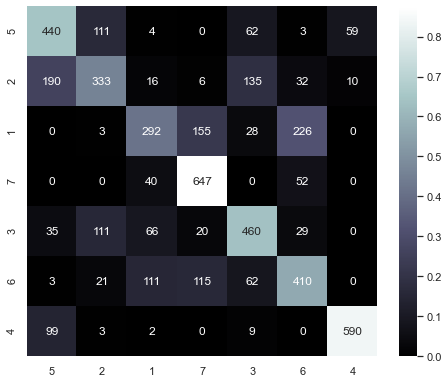

In [33]:
cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, train.Cover_Type.unique())

In [34]:
# save the results
model_results = save_results('RidgeClassifier', acc_train, acc_test, sc_ridge, model_results)

,algorithm,accuracy_train,accuracy_test,cross_val_score_mean,cross_val_score_std
0,DecisionTreeClassifier,100,77.8958,0.709458,0.0843746
1,ExtraTreeClassifier,99.3781,81.483,0.742526,0.0941889
2,KNeighborsClassifier,90.7404,80.6212,0.708466,0.107258
3,MLPClassifier,67.9961,67.2345,0.503042,0.157859
4,RandomForestClassifier,99.9901,85.511,0.781812,0.0929254
5,RidgeClassifier,63.5933,63.5671,0.592394,0.130191


# Model Evaluates 

In [54]:
model_results.sort_values('accuracy_test', ascending=False)

,algorithm,accuracy_train,accuracy_test,cross_val_score_mean,cross_val_score_std
4,RandomForestClassifier,99.9901,85.511,0.781812,0.0929254
1,ExtraTreeClassifier,99.3781,81.483,0.742526,0.0941889
2,KNeighborsClassifier,90.7404,80.6212,0.708466,0.107258
0,DecisionTreeClassifier,100,77.8958,0.709458,0.0843746
3,MLPClassifier,67.9961,67.2345,0.503042,0.157859
5,RidgeClassifier,63.5933,63.5671,0.592394,0.130191


So our best model is a Random Forest...Let's submit it to evaluate

## Submission 

In [55]:
# predict the test dataframe
y_pred  = clf_random_forest.predict(test)

#sample_submission
sample_submission['Cover_Type'] = y_pred

# Lets see the head of our submission file
display(sample_submission.head())

# Analyse the % of Cover Types predicted
display(sample_submission['Cover_Type'].value_counts(normalize=True)*100)

# Save the 
file_name = '2-sub_randomforest' 
sample_submission.to_csv('../../submissions/{}.csv'.format(file_name), index=False)

,Id,Cover_Type
0,15121,2
1,15122,1
2,15123,2
3,15124,2
4,15125,2


2    38.616379
1    37.676270
3     6.534286
5     6.246598
7     5.799693
6     4.563415
4     0.563358
Name: Cover_Type, dtype: float64